## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [413]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [414]:
X.isnull().any().any()
# Пропущенных значений нет

False

In [415]:

X.equals(X._get_numeric_data())
# Категориальных признаков нет, т.к. все ячейки представлены в численном виде

True

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [416]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [420]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
neighbours = [1, 3, 5, 10, 15, 25]
clfs = dict()

# Масштабируем признаки
X_train_norm = normalizer.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_norm = normalizer.transform(X_test[['alcohol', 'magnesium']])

# Классификатор
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("NN", "Train", "Test", sep="\t")

for nn in neighbours:
    clfs[nn] = KNeighborsClassifier(n_neighbors=nn)
    
    # Обучаем классификатор и делаем предсказания
    clfs[nn].fit(X_train_norm, y_train)
    
    score_train = accuracy_score(y_train, clfs[nn].predict(X_train_norm))
    score_test = accuracy_score(y_test, clfs[nn].predict(X_test_norm))
    print(nn, round(score_train, 2), round(score_test, 2), sep="\t")

NN	Train	Test
1	1.0	0.61
3	0.83	0.56
5	0.81	0.59
10	0.79	0.59
15	0.74	0.54
25	0.76	0.52


### ПРИМЕР ВЫВОДА ###
NN 	 Train 	 Test
1 	 1.0 	 0.56
3 	 0.83 	 0.61
5 	 0.81 	 0.63
10 	 0.79 	 0.54
15 	 0.74 	 0.57
25 	 0.76 	 0.56


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [80]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

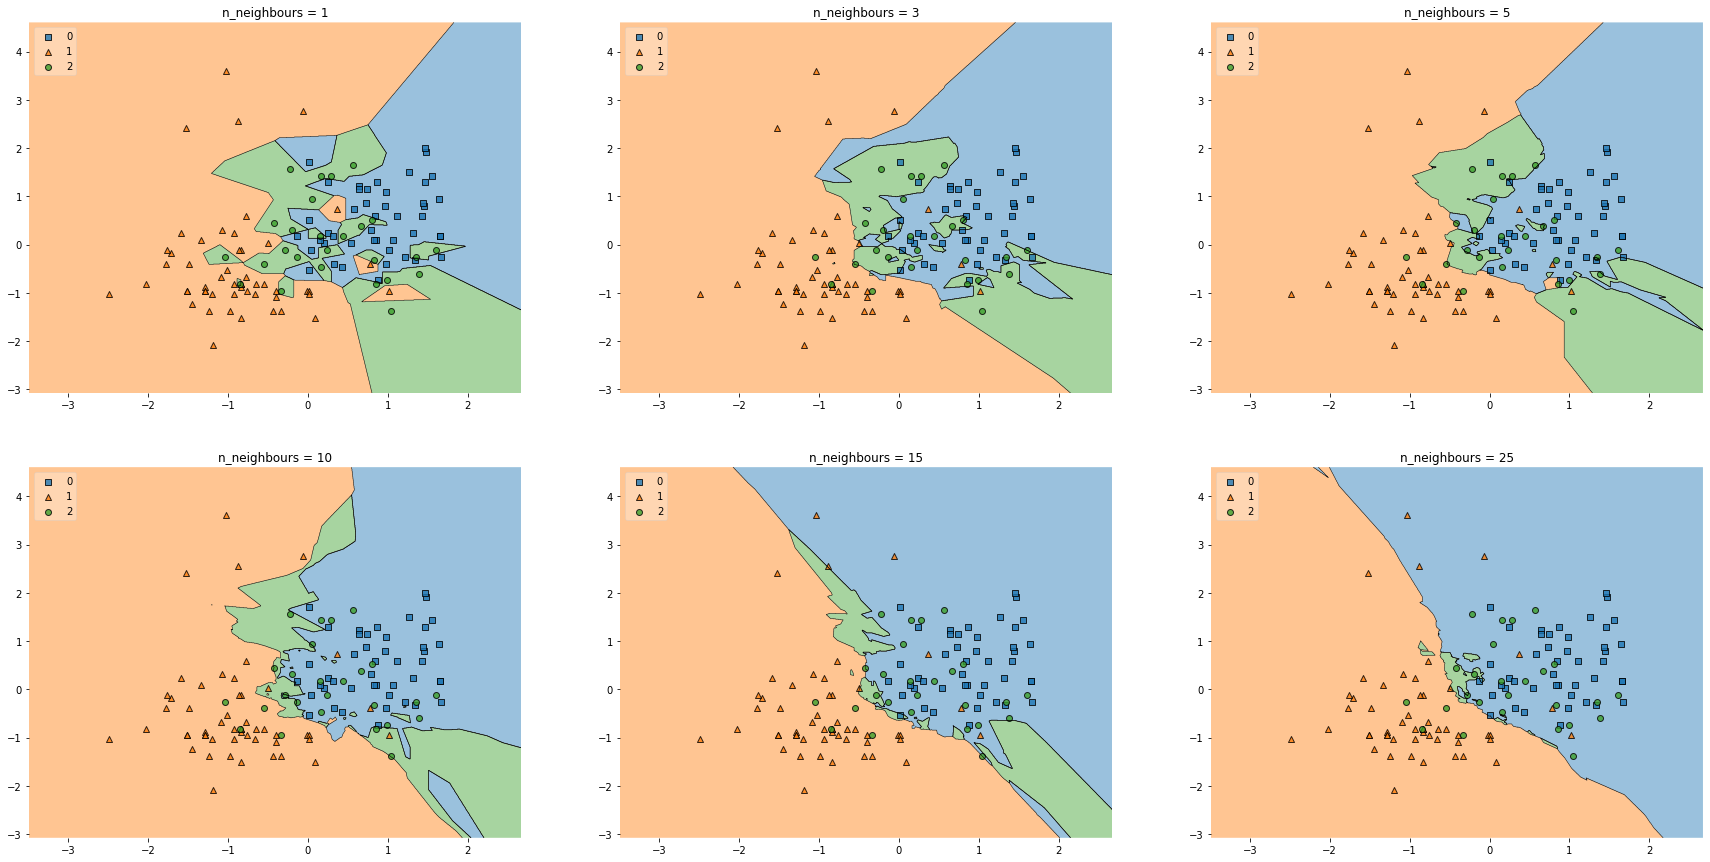

In [116]:
from mlxtend.plotting import plot_decision_regions

neighbours = [1, 3, 5, 10, 15, 25]
cnt = 1
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(30, 15)

for nn in neighbours:
    plt.subplot(2, 3, cnt)
    plot_decision_regions(X_train_norm, y_train, clf=clfs[nn], legend=2)
    plt.title('n_neighbours = ' + str(nn))
    cnt += 1

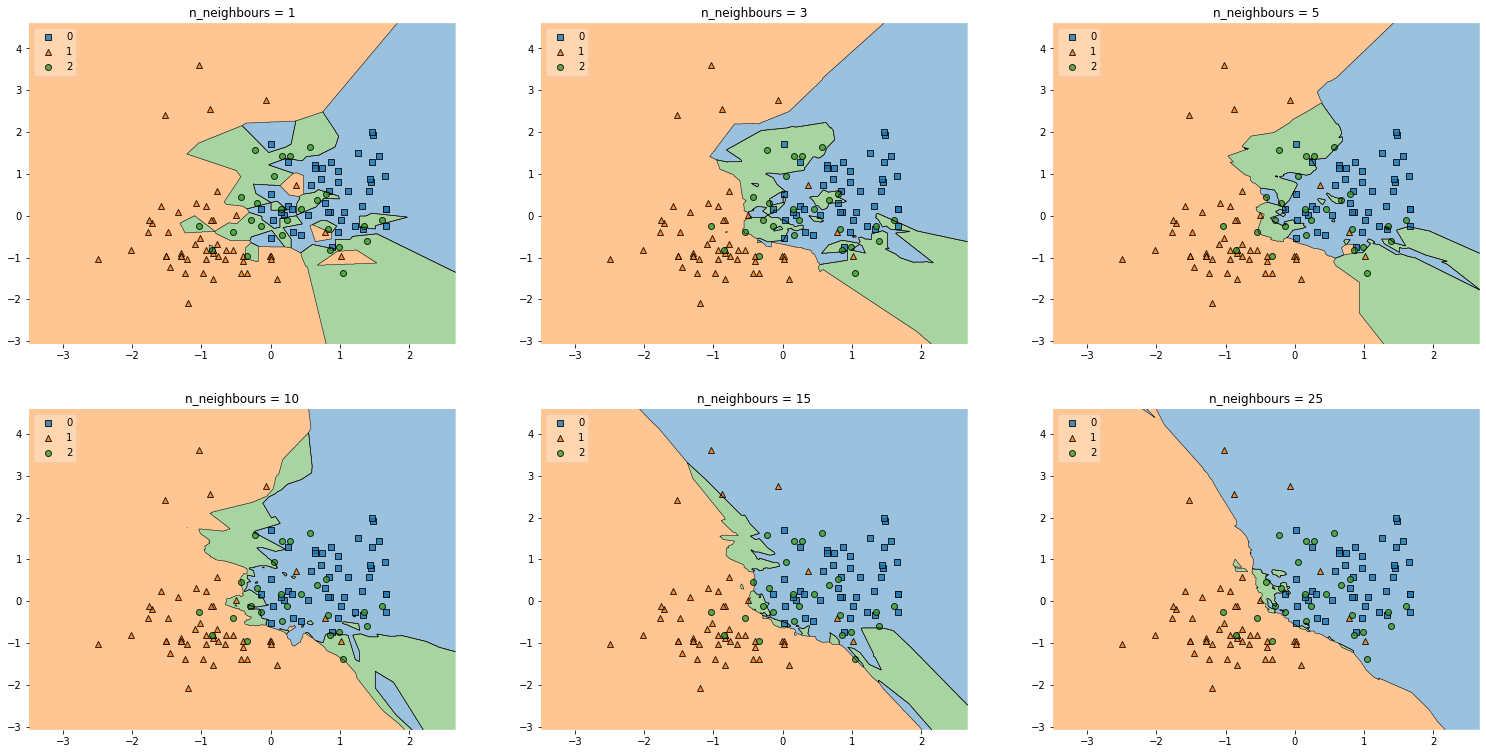

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

* Исходя из задачи 1.3, исходя из обученных классификаторов, наиболее оптимальным количеством ближайших соседей является - 1, т.к. accuracy на тестовой выборке достигает наибольшего значения
* С точки зрения графиков в 1.5:
    * 1) Для кол-ва соседей 1 и 3 - много маленьких отсровков (плохо, т.к. подстраивается под выбросы)
    * 2) Для кол-ва соседей 15 и 25 - оранжевая и синяя область почти поглотили зеленую
    * 3) Для кол-ва соседей 10 - пропущенно много зеленых классов
    * Итого: оптимальным является - 5 ближайших соседей

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

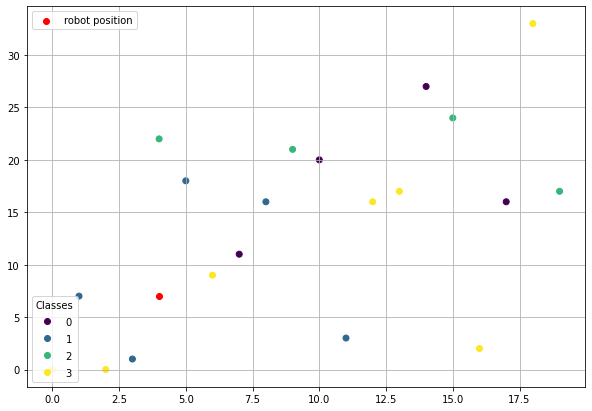

In [5]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [312]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if np.random.binomial(1, 0.2):
            new_position = self.trajectory[-1] + self.mapping[0]
            
            self.trajectory = np.concatenate((self.trajectory, np.array([new_position])))
        else:
            predicted_class = self.knn.predict([self.trajectory[-1]])[0]
            new_position = self.trajectory[-1] + self.mapping[predicted_class]
            
            self.trajectory = np.concatenate((self.trajectory, np.array([new_position])))

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [339]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    plt.title("n_neighbours = " + str(k))
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()
    

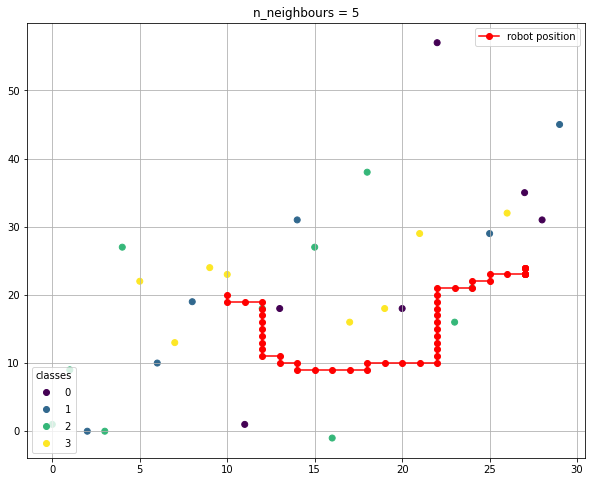

In [340]:
# Моя версия
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

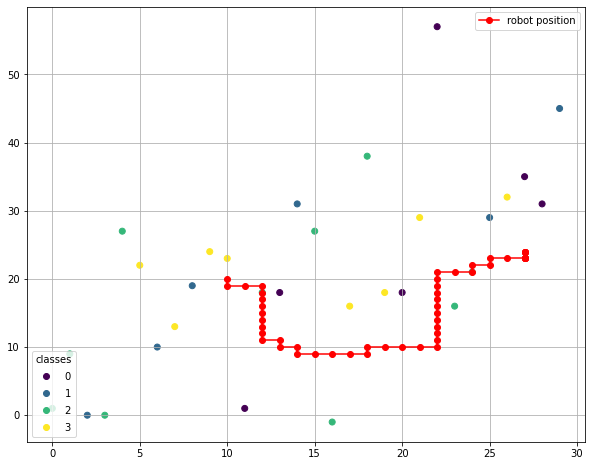

In [341]:
# Оригинальная версия
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

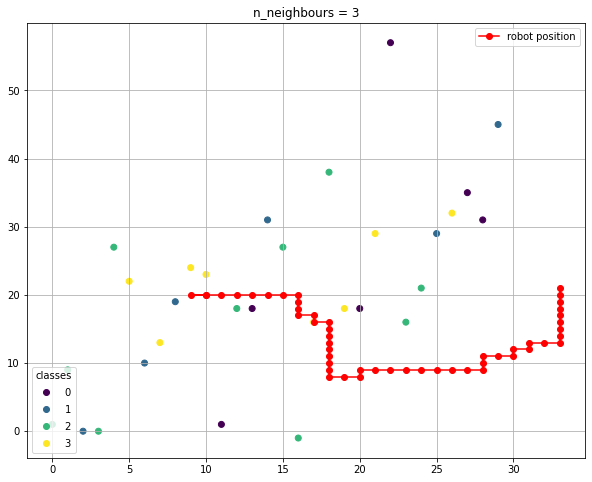

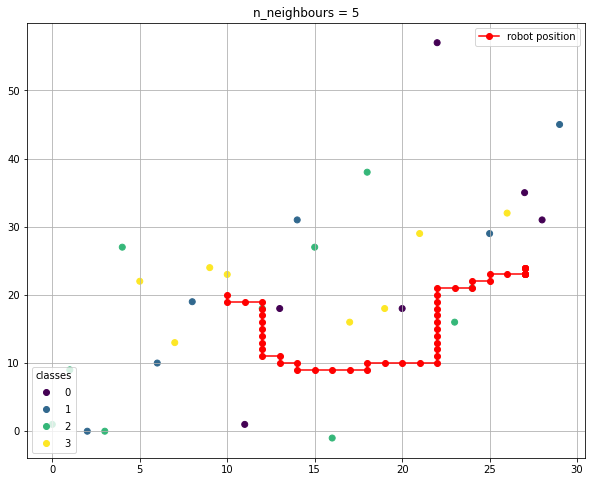

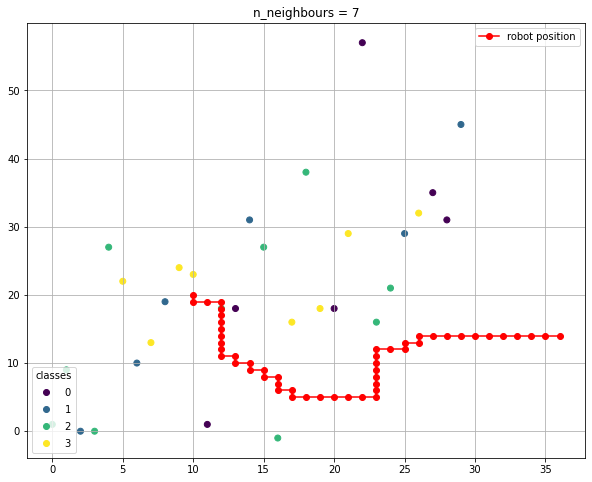

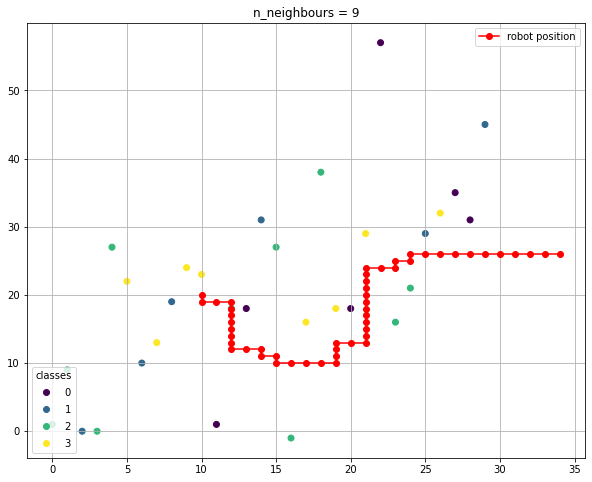

In [342]:
neighbours = [3, 5, 7, 9]

# В данном случае ближайшие соседи - это в прямом смысле соседи-точки, которые находятся с позиции робота ближе всего.
# Например, для первого вертикального пути (x == 11), преобладают 3 желтых из 5 ближайших соседей, поэтому мы идем вниз

# Если бы классы назначались осмысленно, то была бы возможность управлять траекторией робота

# Графики
for nn in neighbours:
    conduct_experiment(x, mean = 3, std = 10, k = nn, n_movements = 50)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [600]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [601]:
# Пропущенные значение отсутствуют
data.isnull().any().any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [602]:
# Удалим столбец индексов (единственный не названный столбец)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

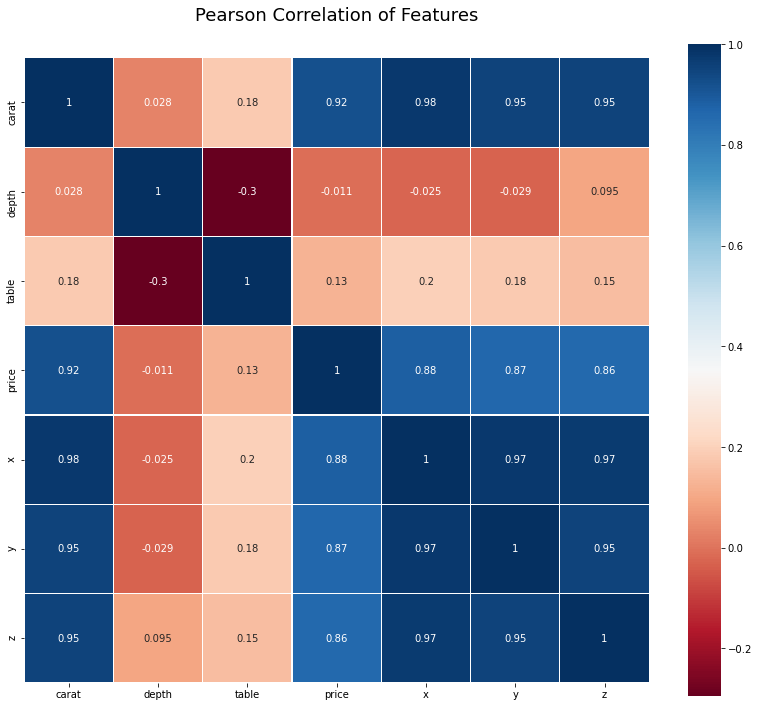

In [603]:
import seaborn as sns
# Чтобы посмотреть степень влияния на price
NumericData = data._get_numeric_data()
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

# Больше всего коррелирует признак carat (0.92)

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [604]:
data = pd.get_dummies(data=data, drop_first=True)
data.head(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [674]:
mask = data.columns == "price"
X = data.loc[:, ~mask]
y = data.price

np.random.seed(1337)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [675]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

# Масштабируем признаки
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [700]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_norm, y_train)  # найдем веса линейной модели

print("Score:", lr.score(X_train_norm, y_train))
print("MSE on train:", round(float(mean_squared_error(y_train, lr.predict(X_train_norm))), 2))
print("MSE on test:", round(float(mean_squared_error(y_test, lr.predict(X_test_norm))), 2))

Score: 0.919812742877861
MSE on train: 1278935.99
MSE on test: 1272521.36


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [702]:
lr.coef_
# 1, 4, 18, 20, 21, 22, 23 переменные на порядок (в некоторых случаях на 2 порядка) больше всех остальных

array([ 5.31779713e+03, -8.37448051e+01, -5.72743537e+01, -1.02876187e+03,
        3.32849210e-01, -1.07269347e+02,  1.74183367e+02,  4.17657148e+02,
        3.32716765e+02,  3.09519564e+02, -8.17484445e+01, -1.00093160e+02,
       -1.94136597e+02, -3.54381593e+02, -4.46010402e+02, -5.24293631e+02,
        9.51577393e+02,  1.55060947e+03,  9.89128366e+02,  1.62461308e+03,
        1.76755677e+03,  1.23616793e+03,  1.42202557e+03])

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [703]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=10)
ridge = linear_model.Ridge(alpha=10)
lasso.fit(X_train_norm, y_train)
ridge.fit(X_train_norm, y_train)

# Для lasso веса сильно уменьшились (было 7 признаков, превышающих 1e3, а стало 3)

# Для Ridge веса чуть ниже уровня, чем были в изначальной регрессии без регуляризации
# (было 7 признаков, превышающих 1e3, а стало 6)

# Т.е. мультиколлинеарность все же была и влияла на результат регрессии

print("Lasso coefs:", lasso.coef_)
print("Ridge coefs:", ridge.coef_)

Lasso coefs: [4848.7882142   -88.60149151  -65.10613567 -582.78433634   -0.
 -128.0359488    53.75925649  220.8140768   152.32827425  146.00997673
  -11.83609368  -34.84110268 -116.14119395 -281.92206441 -375.27478278
 -466.22222661  644.48797235  836.88648373  372.03430547 1021.56374133
 1070.39758256  815.84723368  935.62446946]
Ridge coefs: [ 5.28120987e+03 -8.04365586e+01 -5.72829709e+01 -9.77742565e+02
  1.40153407e-01 -1.23589619e+02  1.74828132e+02  4.19033481e+02
  3.33711976e+02  3.11032172e+02 -8.13492779e+01 -9.99054961e+01
 -1.93540960e+02 -3.53504310e+02 -4.44740964e+02 -5.23018165e+02
  9.39700276e+02  1.52162286e+03  9.64552133e+02  1.60041111e+03
  1.73940979e+03  1.21970451e+03  1.40270923e+03]


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

#### Ответ: Lasso агрессивнее уменьшает веса, т.к. сумма модулей больше, чем корень суммы квадратов (док-во ниже). Именно поэтому, оно выделяет наиболее важные признаки, по сравнению с другими

<center>
Lasso vs. Ridge (regularization)
</center>

\begin{equation}
\sum_{i=1}^k|w_i| \quad ? \quad \|w\|^2
\end{equation}

\begin{equation}
|w_1| + ... + |w_k|  \quad ? \quad  \sqrt{w_1^2 + ... + w_k^2}
\end{equation}


\begin{equation}
(|w_1| + ... + |w_k|)^2  \quad > \quad  w_1^2 + ... + w_k^2
\end{equation}

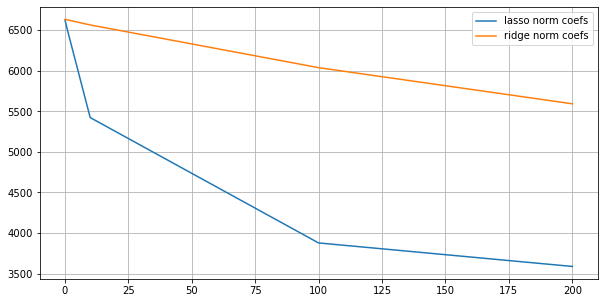

In [679]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norm, ridge_norm = [], []

for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=5000)
    ridge = linear_model.Ridge(alpha=alpha, max_iter=5000)
    lasso.fit(X_train_norm, y_train)
    ridge.fit(X_train_norm, y_train)
    
    lasso_norm.append([alpha, np.linalg.norm(lasso.coef_)])    
    ridge_norm.append([alpha, np.linalg.norm(ridge.coef_)])

plt.figure(figsize=(10, 5))

lasso_x, lasso_y = zip(*lasso_norm)
plt.plot(lasso_x, lasso_y)

ridge_x, ridge_y = zip(*ridge_norm)
plt.grid()
plt.plot(ridge_x, ridge_y)
plt.legend(('lasso norm coefs', 'ridge norm coefs'))
plt.show()

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [705]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5, alphas=alphas, max_iter = 5000).fit(X_train, y_train)

alphas = reg.alphas_
mean_mse = np.matrix(reg.mse_path_).mean(1)

print("alpha", "mean mse", sep="\t")
for i in range(len(alphas)):
    print(alphas[i], round(mean_mse[i, 0], 2), sep="\t")
    
# В данном случае, среднее mse будет наилучшим при alpha = 0.1

alpha	mean mse
200.0	3527812.51
100.0	2491085.58
10.0	1524625.29
1.0	1287306.28
0.1	1283701.14


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [706]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train_norm, y_train)
print("Column name", "Weight", sep="\t")
for i in range(len(X.columns)):
    print(X.columns[i], round(lasso.coef_[i], 2), sep="\t\t" if len(X.columns[i]) <= 7 else "\t")

# Самый информативный признак - это 'carat', т.к. имеет наибольше вес после обучения. Это и логично, 
# ведь масса кристалла - и есть главный признак стоимости камня

# Наименее информативными признаками оказаись - 'y', видимо была получена линейная зависимость от других координаты

Column name	Weight
carat		5314.34
depth		-84.35
table		-57.36
x		-1029.17
y		-0.0
z		-103.51
cut_Good	172.98
cut_Ideal	415.67
cut_Premium	330.92
cut_Very Good	307.85
color_E		-81.05
color_F		-99.43
color_G		-193.35
color_H		-353.66
color_I		-445.32
color_J		-523.73
clarity_IF	948.44
clarity_SI1	1543.39
clarity_SI2	982.88
clarity_VS1	1618.5
clarity_VS2	1760.49
clarity_VVS1	1231.88
clarity_VVS2	1417.08


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [707]:
print("MSE on test (Linear Regr.):", round(float(mean_squared_error(y_test, lr.predict(X_test_norm))), 2))
print("MSE on test (Lasso Regr.):", round(float(mean_squared_error(y_test, lasso.predict(X_test_norm))), 2))

# В данном случае, немного выигрывает Linear regr., но если разбивать выборку на обучающую и тестовую по другому, то 
# результат может варьироваться

# Для данного разбиения - регуляризатор почти не сыграл свою роль и не смог улучшить результат обычной регрессии

# В любом случае, лучше использовать модель, ограничивающую значения весов (например Lasso regr.), 
# чтобы избежать переобученности и влияния мультиколлинеарности

MSE on test (Linear Regr.): 1272521.36
MSE on test (Lasso Regr.): 1272542.34


In [695]:
print(f"Разница MSE регрессий всего {round(1272542.34 / 1272521.36  * 100 - 100, 4)}%")

Разница MSE регрессий всего 0.0016%
